In [17]:
import yfinance as yf
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ticker_symbol = 'WMT'

ticker_data = yf.Ticker(ticker_symbol)

balance_sheet = ticker_data.balance_sheet
financials = ticker_data.financials
cashflow = ticker_data.cashflow

In [4]:
pd.set_option('display.max_rows', 1000)

In [38]:
companies = {
    'Walmart':'WMT',
    'Kohls':'KSS',
    'Amazon':'AMZN',
    'Costco':'COST',
    'Lowes':'LOW',
    'Target':'TGT',
    'Kroger':'KR',
    'Tesco':'TSCO',
    'Carrefour':'CA.PA',
    'Sainsburys':'SBRY.L',
    'Koninklijke Ahold Delhaize NV':'AD.AS',
     'Loblaws':'L.TO',
    'Woolworths Group':'WOW.AX',
    'Metro AG':'B4B.DE',
    'Seven & I Holdings':'SVNDY',
    'Grupo Bimbo':'BIMBOA.MX',
    'Dollar Tree': 'DLTR',
    'Dollar General': 'DG',
    'BJs Wholesale Club': 'BJ',
    'PriceSmart': 'PSMT'}

In [39]:
balance_sheets = pd.DataFrame()
financial_sheets = pd.DataFrame()
for ticker in companies.values():
    ticker_data = yf.Ticker(ticker)
    balance_sheet = ticker_data.balance_sheet
    balance_sheets[ticker] = balance_sheet.iloc[:,0]

    financials = ticker_data.financials
    financial_sheets[ticker] = financials.iloc[:,0]

In [40]:
df_annual_reports = pd.concat([balance_sheets, financial_sheets]).T

In [41]:
df_annual_reports['APT'] = df_annual_reports['Cost Of Revenue']/df_annual_reports['Accounts Payable']
df_annual_reports['INVT'] = df_annual_reports['Cost Of Revenue']/df_annual_reports['Inventory']
df_annual_reports['ART'] = df_annual_reports['Total Revenue']/df_annual_reports['Accounts Receivable']
df_annual_reports['PPET'] = df_annual_reports['Net PPE']/df_annual_reports['Total Revenue']

In [42]:
df_annual_reports['ART'] = df_annual_reports['ART'].fillna(0)

In [43]:
df_annual_reports['C2C'] = (- 1/df_annual_reports['APT'] + 1/df_annual_reports['INVT'] + 1/df_annual_reports['ART'])*52

In [44]:
df_annual_reports['Gross_Margin'] =  df_annual_reports['Cost Of Revenue'] / df_annual_reports['Total Revenue']
df_annual_reports['Margin'] =  df_annual_reports['Operating Income'] / df_annual_reports['Total Revenue']

In [45]:
pd.options.display.float_format = '{:,.3f}'.format

In [46]:
df_annual_reports = df_annual_reports.assign(Names=list(companies.keys()))

In [51]:
df_annual_reports[['Names', 'APT', 'INVT', 'ART', 'C2C', 'PPET', 'Gross_Margin', 'Margin', 'Total Revenue']].sort_values('INVT')

,Names,APT,INVT,ART,C2C,PPET,Gross_Margin,Margin,Total Revenue
TSCO,Tesco,6.603,3.407,0.000,inf,0.355,0.650,0.101,"14,204,717,000.000"
LOW,Lowes,6.158,3.497,0.000,inf,0.217,0.668,0.105,"97,059,000,000.000"
DLTR,Dollar Tree,10.210,3.559,0.000,inf,0.403,0.685,0.079,"28,331,700,000.000"
KSS,Kohls,8.614,3.593,0.000,inf,0.565,0.633,0.014,"18,098,000,000.000"
DG,Dollar General,7.325,3.849,0.000,inf,0.420,0.688,0.088,"37,844,863,000.000"
TGT,Target,6.097,6.091,93.345,0.565,0.313,0.754,0.035,"109,120,000,000.000"
L.TO,Loblaws,6.196,6.580,10.965,4.252,0.232,0.682,0.059,"56,504,000,000.000"
PSMT,PriceSmart,8.059,7.748,246.417,0.470,0.219,0.828,0.045,"4,411,842,000.000"
WMT,Walmart,8.587,8.196,77.056,0.963,0.195,0.759,0.033,"611,289,000,000.000"
CA.PA,Carrefour,3.713,9.688,39.156,-7.310,0.202,0.804,0.028,"83,088,000,000.000"


Text(0, 0.5, 'Gross Margin')

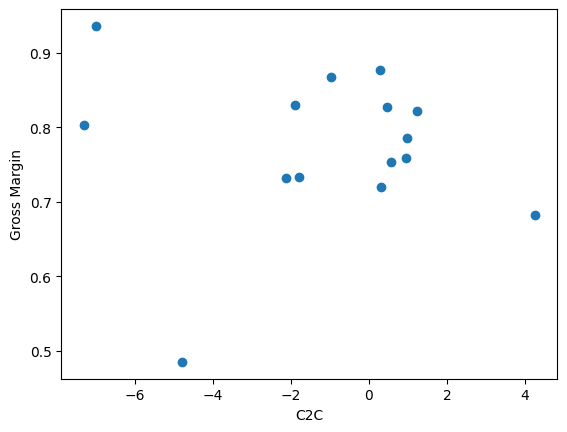

In [48]:
fig, ax = plt.subplots()

plt.scatter(df_annual_reports.C2C, df_annual_reports.Gross_Margin)
ax.set_xlabel("C2C")
ax.set_ylabel("Gross Margin")